In [1]:
#Importing the dataset

import pandas as pd
import numpy as np

medical_df = pd.read_csv('C:/Users/court/OneDrive/Desktop/WGU/D209/medical_clean_D209.csv', index_col=0)
pd.set_option('display.max_columns', None)
medical_df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [2]:
#Checking for Duplicate Values
medical_df.duplicated().value_counts()

False    10000
dtype: int64

In [3]:
#Dropping Unneeded Columns for Analysis

medical_df = medical_df.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income',
                              'Marital', 'Gender', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)

medical_df.head()

,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,
1,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
2,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
3,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
4,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
5,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786


In [4]:
#Data Type/Structure Evaluation

medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  object 
 1   VitD_levels         10000 non-null  float64
 2   Doc_visits          10000 non-null  int64  
 3   Full_meals_eaten    10000 non-null  int64  
 4   vitD_supp           10000 non-null  int64  
 5   Soft_drink          10000 non-null  object 
 6   Initial_admin       10000 non-null  object 
 7   HighBlood           10000 non-null  object 
 8   Stroke              10000 non-null  object 
 9   Complication_risk   10000 non-null  object 
 10  Overweight          10000 non-null  object 
 11  Arthritis           10000 non-null  object 
 12  Diabetes            10000 non-null  object 
 13  Hyperlipidemia      10000 non-null  object 
 14  BackPain            10000 non-null  object 
 15  Anxiety             10000 non-null  object 
 16  Alle

In [5]:
#Checking for Null Values

medical_df.isna().sum()

ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

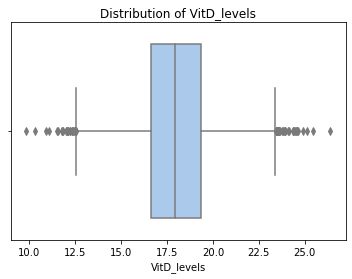

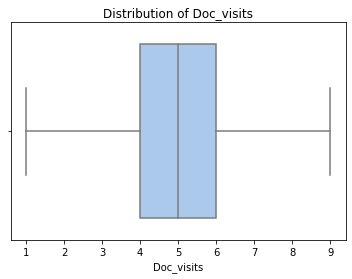

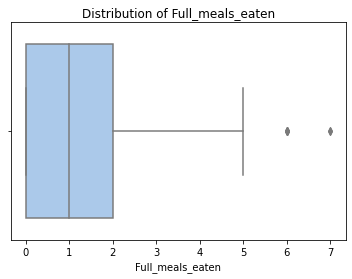

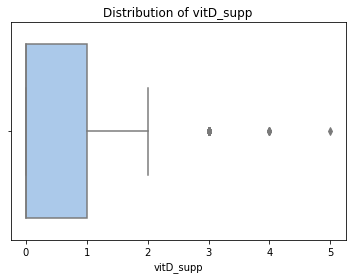

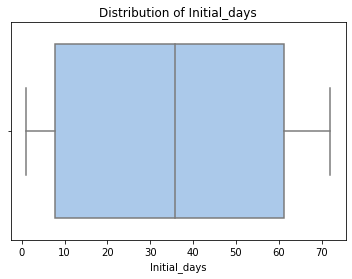

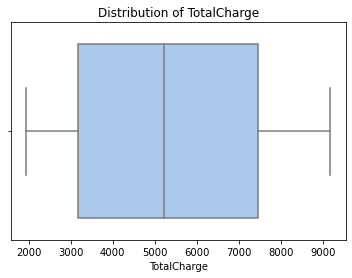

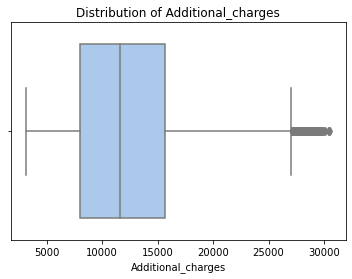

In [6]:
#Checking for Outliers in Numeric Data

import matplotlib.pyplot as plt
import seaborn as sns

num_variables = ['VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

#generating boxplots of numeric variables

for variable in num_variables:
    sns.set_palette("pastel")
    sns.boxplot(x=variable, data=medical_df)
    plt.title("Distribution of " + variable)
    plt.show()

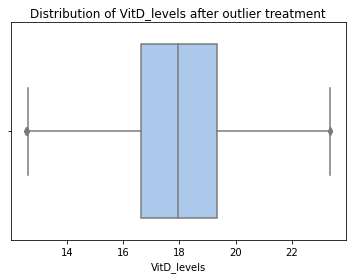

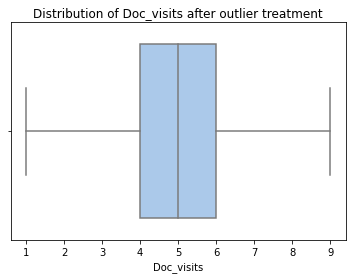

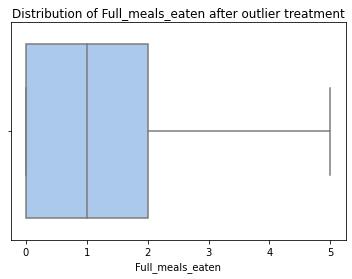

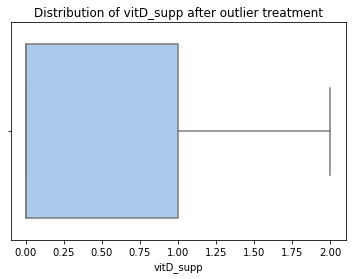

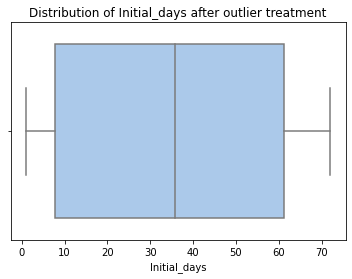

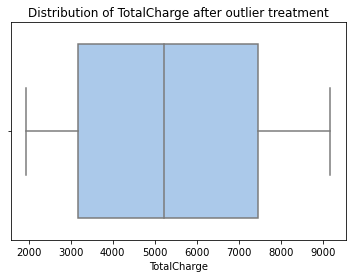

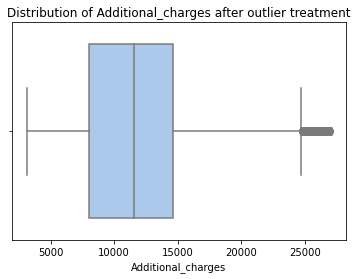

In [7]:
#Imputation with median value for values 1.5*IQR outside 25th and 75th percentile

for variable in num_variables:
    Q1 = medical_df[variable].quantile(q=0.25)
    Q2 = medical_df[variable].quantile(q=0.5)
    Q3 = medical_df[variable].quantile(q=0.75)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    medical_df[variable] = np.where(medical_df[variable] < low_lim, Q2, medical_df[variable])
    medical_df[variable] = np.where(medical_df[variable] > up_lim, Q2, medical_df[variable])
    

#Examining boxplots to verify treatment of outlier values
for variable in num_variables:
    sns.boxplot(x=variable, data=medical_df)
    plt.title("Distribution of " + variable + " after outlier treatment")
    plt.show()

In [8]:
print(medical_df['ReAdmis'].value_counts())

No     6331
Yes    3669
Name: ReAdmis, dtype: int64


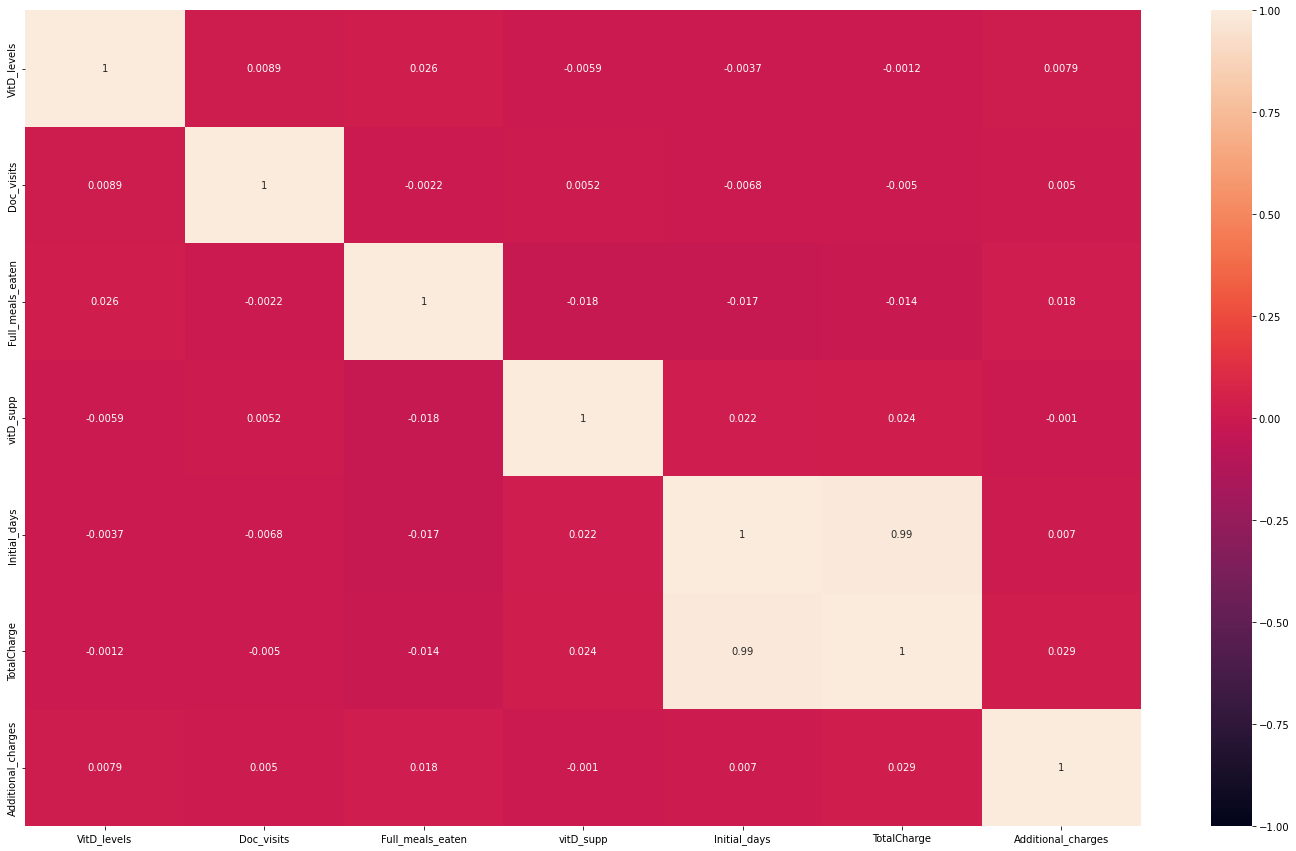

In [9]:
#Examining Correlation Between Numeric Data
#Generating a Heatmap
plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(medical_df.corr(), vmin = -1, vmax = 1, annot=True)

In [10]:
#Removing TotalCharge from the dataframe

medical_df = medical_df.drop(['TotalCharge'], axis = 1)

medical_df.head()

,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Additional_charges
CaseOrder,,,,,,,,,,,,,,,,,,,,,,
1,No,19.141466,6.0,0.0,0.0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,17939.403420
2,No,18.940352,4.0,2.0,1.0,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,17612.998120
3,No,18.057507,4.0,1.0,0.0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,17505.192460
4,No,16.576858,4.0,1.0,0.0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,12993.437350
5,No,17.439069,5.0,0.0,2.0,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,3716.525786


In [11]:
#Encoding Binary Yes/No

binary_variables = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

for variable in binary_variables:
    medical_df[variable].replace(['No', 'Yes'], [0,1], inplace=True)
    

#Inspecting first five records to verify encoding
medical_df.head()

,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Additional_charges
CaseOrder,,,,,,,,,,,,,,,,,,,,,,
1,0,19.141466,6.0,0.0,0.0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,17939.403420
2,0,18.940352,4.0,2.0,1.0,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,17612.998120
3,0,18.057507,4.0,1.0,0.0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,17505.192460
4,0,16.576858,4.0,1.0,0.0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,12993.437350
5,0,17.439069,5.0,0.0,2.0,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,3716.525786


In [12]:
#Encoding Complication_Risk

medical_df['Complication_risk'].replace(['Low', 'Medium', 'High'], [0, 1, 2], inplace = True)

In [13]:
#Encoding Nominal Categorical Data

dummy_columns = ['Initial_admin', 'Services']

medical_df = pd.get_dummies(medical_df, columns = dummy_columns)

medical_df.head()

,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Additional_charges,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,19.141466,6.0,0.0,0.0,0,1,0,1,0,1,1,0,1,1,1,0,1,10.585770,17939.403420,0,1,0,1,0,0,0
2,0,18.940352,4.0,2.0,1.0,0,1,0,2,1,0,0,0,0,0,0,1,0,15.129562,17612.998120,0,1,0,0,0,1,0
3,0,18.057507,4.0,1.0,0.0,0,1,0,1,1,0,1,0,0,0,0,0,0,4.772177,17505.192460,1,0,0,1,0,0,0
4,0,16.576858,4.0,1.0,0.0,0,0,1,1,0,1,0,0,0,0,0,1,1,1.714879,12993.437350,1,0,0,1,0,0,0
5,0,17.439069,5.0,0.0,2.0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.254807,3716.525786,1,0,0,0,1,0,0


In [14]:
#Scaling, KNN, CV in a Pipeline
#Assigning values to X for all features and y for the target variable

X = medical_df.drop('ReAdmis', axis = 1).values
y = medical_df['ReAdmis'].values

In [15]:
#Importing Needed Packages

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [16]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 19, stratify = y)

#Scaling the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Setting up the knn classifier

knn = KNeighborsClassifier()

#Setting up GridSearchCV to find ideal number of k

parameters = {'n_neighbors' : np.arange(1, 101)}

knncv = GridSearchCV(estimator = knn, param_grid = parameters, n_jobs = -1, cv = 5)

knncv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

In [17]:
#Obtaining best number of k neighbors
print(knncv.best_params_)

{'n_neighbors': 69}


In [18]:
#Obtaining best score from gridsearch
print(knncv.best_score_)

0.8905333333333333


In [19]:
#fit the model using grid search best param - k = 69

knn_model = KNeighborsClassifier(n_neighbors = 69)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=69)

In [20]:
#Model Evaluation:
#Model score
model_score = knn_model.score(X_test, y_test)

print("The model's accuracy score is: ", model_score)

The model's accuracy score is:  0.8896


In [21]:
#Generating prediction values on the test data
y_pred = knn_model.predict(X_test)

In [22]:
#Generating Classification Reports and Confusion Matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1583
           1       0.91      0.77      0.84       917

    accuracy                           0.89      2500
   macro avg       0.90      0.87      0.88      2500
weighted avg       0.89      0.89      0.89      2500



In [23]:
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[1515   68]
 [ 208  709]]


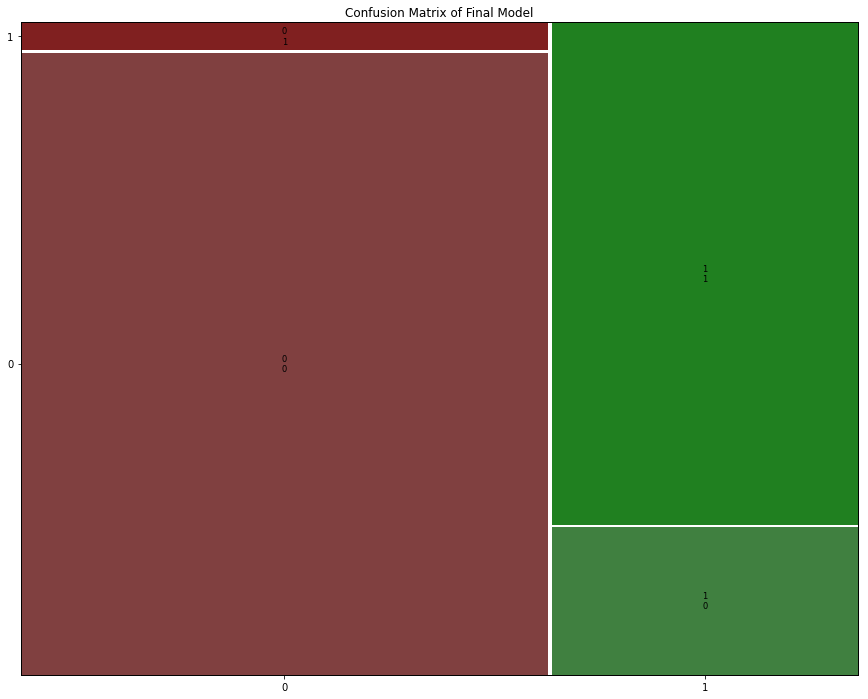

In [24]:
#Mosaic Plot
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(15, 12))
mosaic(confusion_matrix, gap=0.005, ax=ax, title='Confusion Matrix of Final Model', axes_label=True)
plt.show()

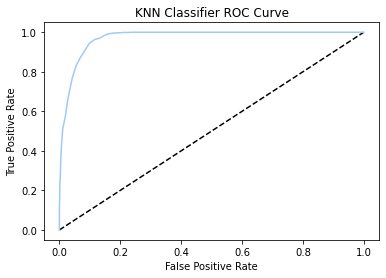

In [25]:
#ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_pred_prob = knn_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier ROC Curve')
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9723999749244115

In [27]:
#Exporting DataSets

medical_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D209/medical_data__KNN_clean.csv')

In [28]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [29]:
X_train_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D209/X_train.csv')
X_test_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D209/X_test.csv')

y_train_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D209/y_train.csv')
y_test_df.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D209/y_test.csv')